<a href="https://colab.research.google.com/github/farid-hamid/DataScience01/blob/main/MMM_notebook_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Marketing Mix Model Analysis notebook**


---


*Basic analysis; reattribution model results from advertising channel mix to identify KPI drivers.*

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MMM_test_data.csv')

In [ ]:
df.head()

,Date,Website Sessions,Online Service Enquiries,Unit Sales,Own price (average unit price),Own distribution,Door to Door Advertising (total £),Own promotions (£),Competitor promotions (index),Competitor advertising (total) (index),...,Retail Store Magazine Inserts,Super Summer Promo,Social Media Shoutout Engagement,NEW MEMBER SIGNUPS,NEW FREE TRIAL SUBSCRIPTIONS,Upweight Flags,Downweight Flags,Door to Door Promotion Leaflets edit,Promotion X Clicks,Promotion Y Clicks Lag 3
0,12/31/2018,87804,71472,175607,4,87,3000,0,1,0,...,1756.0,0.0,0.0,15.0,41.0,0.0,0.0,0.0,0,NaN
1,01/07/2019,90171,72678,180342,4,87,3000,0,1,0,...,1803.0,0.0,0.0,7.0,29.0,0.0,0.0,0.0,0,NaN
2,1/14/2019,98198,79147,196396,4,89,3000,0,1,0,...,2946.0,0.0,0.0,7.0,29.0,0.0,0.0,0.0,0,NaN
3,1/21/2019,103582,73544,207165,4,84,3000,0,0,1,...,2072.0,0.0,0.0,6.0,25.0,0.0,0.0,0.0,0,0.0
4,1/28/2019,113942,80443,227884,4,88,27926,0,1,0,...,1139.0,0.0,0.0,9.0,38.0,0.0,0.0,0.0,0,0.0


## **Exploration of KPI and other variables**

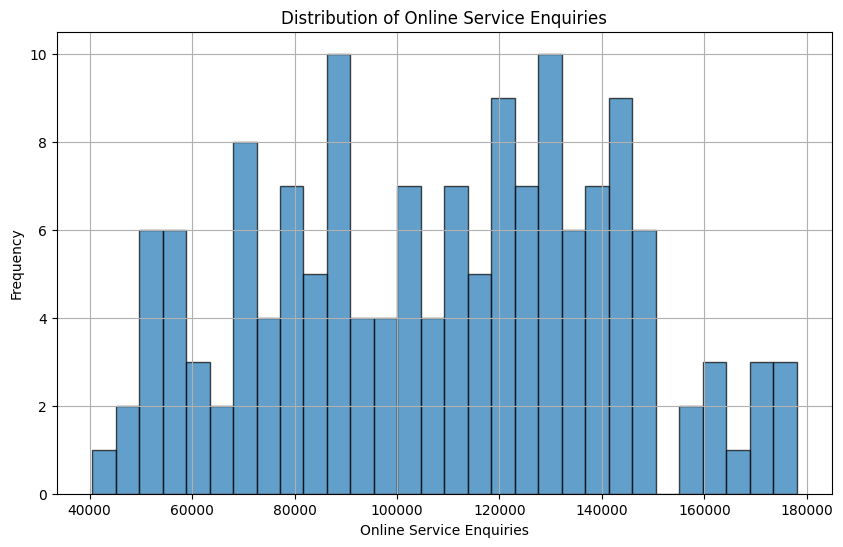

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Online Service Enquiries'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Online Service Enquiries')
plt.xlabel('Online Service Enquiries')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<ipython-input-5-258a3cea8d45>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


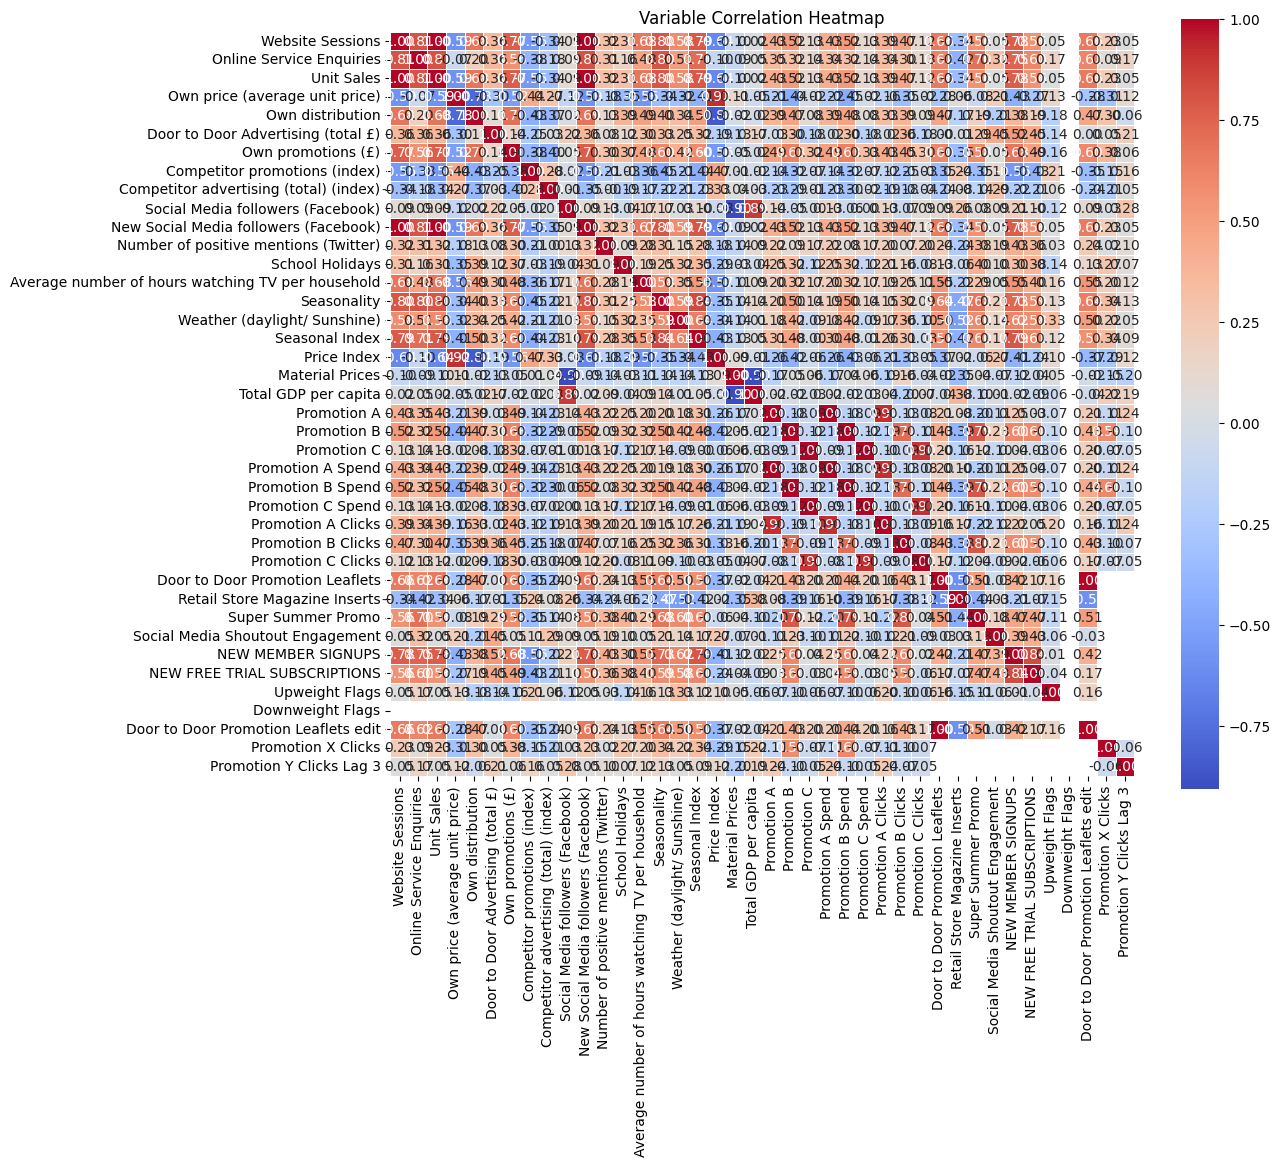

In [ ]:
correlation = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation,annot=True,fmt=".2f",cmap='coolwarm',square=True, linewidths=.5)
plt.title('Variable Correlation Heatmap')
plt.show()

# **Categorising variables into spend, seasonality/macro factors and engagement metrics**

In [ ]:
seasonality_and_flags = ['School Holidays', 'Seasonality', 'Weather (daylight/ Sunshine)', 'Seasonal Index', 'Price Index', 'Material Prices', 'Total GDP per capita', 'Upweight Flags', 'Downweight Flags']
adspend = ['Door to Door Advertising (total £)','Own distribution', 'Own promotions (£)', 'Competitor promotions (index)', 'Competitor advertising (total) (index)', 'Promotion A Spend', 'Promotion B Spend', 'Promotion C Spend']
engagement_metrics = ['Web Sessions', 'Unit Sales', 'Own price (average unit price)', 'Social Media followers (Facebook)', 'New Social Media followers (Facebook)', 'Number of positive mentions (Twitter)', 'Promotion A','Promotion B','Promotion C','Promotion A Clicks','Promotion B Clicks', 'Promotion C Clicks','Promotion X Clicks','Door to Door Promotion Leaflets','Retail Store Magazine Inserts','Super Summer Promo', 'Social Media Shoutout Engagement','NEW MEMBER SIGNUPS','NEW FREE TRIAL SUBSCRIPTIONS','Door to Door Promotion Leaflets edit']

In [ ]:
#sns.pairplot(df[engagement_metrics])

In [ ]:
#sns.pairplot(df[adspend])

In [ ]:
model_variables = ['Online Service Enquiries','Website Sessions', 'Seasonality', 'Promotion A Clicks', 'Promotion C Clicks', 'Promotion X Clicks', 'Promotion Y Clicks Lag 3','Door to Door Promotion Leaflets','Super Summer Promo','Social Media Shoutout Engagement','NEW FREE TRIAL SUBSCRIPTIONS','Upweight Flags','Downweight Flags']


In [ ]:
modeldf = df[model_variables].fillna(0).copy()

# **Fitting random forest regressor to marketing data**

<Axes: >

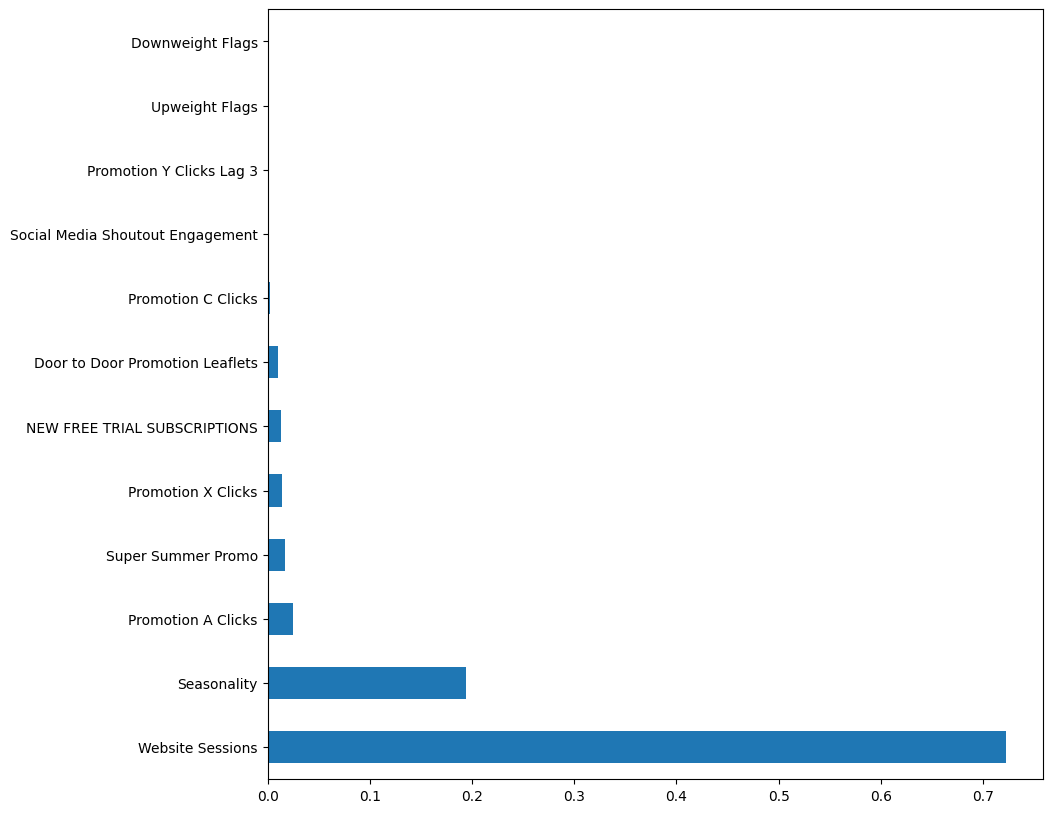

In [ ]:
# Setting X and y variables
X = modeldf.loc[:, modeldf.columns != 'Online Service Enquiries']
y = modeldf['Online Service Enquiries']# Building Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)# Visualizing Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [ ]:
import statsmodels.formula.api as sm

model = sm.ols(formula='Q("Online Service Enquiries") ~ Q("Website Sessions") + Q("Seasonality") + Q("Promotion A Clicks")', data=modeldf).fit()
print(model.summary())


                                  OLS Regression Results                                 
Dep. Variable:     Q("Online Service Enquiries")   R-squared:                       0.735
Model:                                       OLS   Adj. R-squared:                  0.729
Method:                            Least Squares   F-statistic:                     135.6
Date:                           Fri, 15 Mar 2024   Prob (F-statistic):           3.81e-42
Time:                                   16:19:17   Log-Likelihood:                -1688.4
No. Observations:                            151   AIC:                             3385.
Df Residuals:                                147   BIC:                             3397.
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------

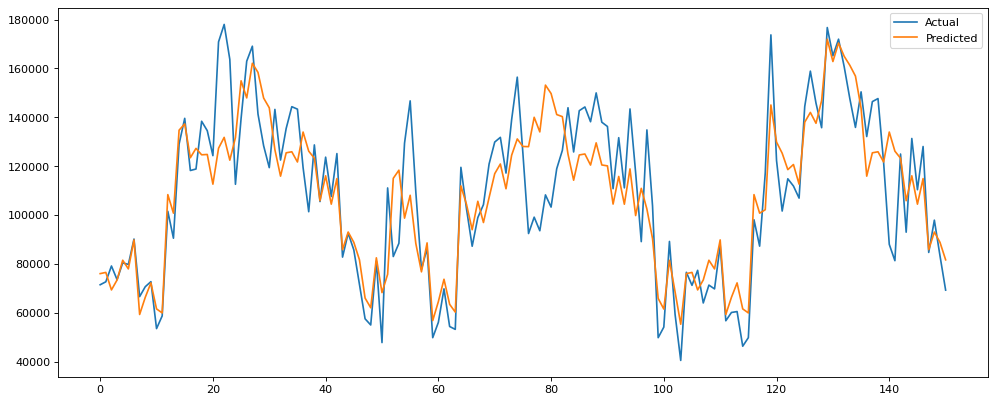

In [ ]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

y_pred = model.predict()
labels = modeldf['Online Service Enquiries']

df_temp = pd.DataFrame({'Actual': labels, 'Predicted': y_pred})
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
y1 = df_temp['Actual']
plt.plot(y1, label='Actual')
y2 = df_temp['Predicted']
plt.plot(y2, label='Predicted')
plt.legend()

plt.show()
